In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from scipy import stats
from scipy.special import boxcox1p
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Volumes/C/Thesis-2019/cluster-output/DG_out.csv',dtype={0:'object',1:'int64',2:'int64',3:'float64',4:'float64',5:'float64',6:'float64',7:'float64',8:'int64',9:'int64',10:'int64',11:'int64',12:'int64'})

In [3]:
pd.options.display.float_format = '{:.3f}'.format
o_df = df.iloc[:,1:8]
o_df.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,2.149,2.149,54.842,54.842,109.683,49.240,28.771
std,7.421,4.512,1303.303,1301.473,2602.527,972.921,712.557
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,0.100,0.100,0.206,0.064,0.050
50%,1.000,2.000,0.932,0.959,1.965,0.535,0.490
75%,2.000,2.000,8.592,9.064,18.400,5.614,4.519
max,1932.000,1322.000,550000.000,500020.700,1050000.000,499259.588,500000.000


In [4]:
def plot_distributions(df):
    c = 0
    bins = 200
    fig, ax = plt.subplots(3, 2, figsize=(15, 18))
    for i in range(3):
        for j in range(2):
            ax[i][j].hist(df.iloc[:,c], bins=bins, alpha=0.9, log=True, density=True)
            ax[i][j].title.set_text(df.columns[c])
            ax[i][j].grid()
            c = c+1
    plt.show()

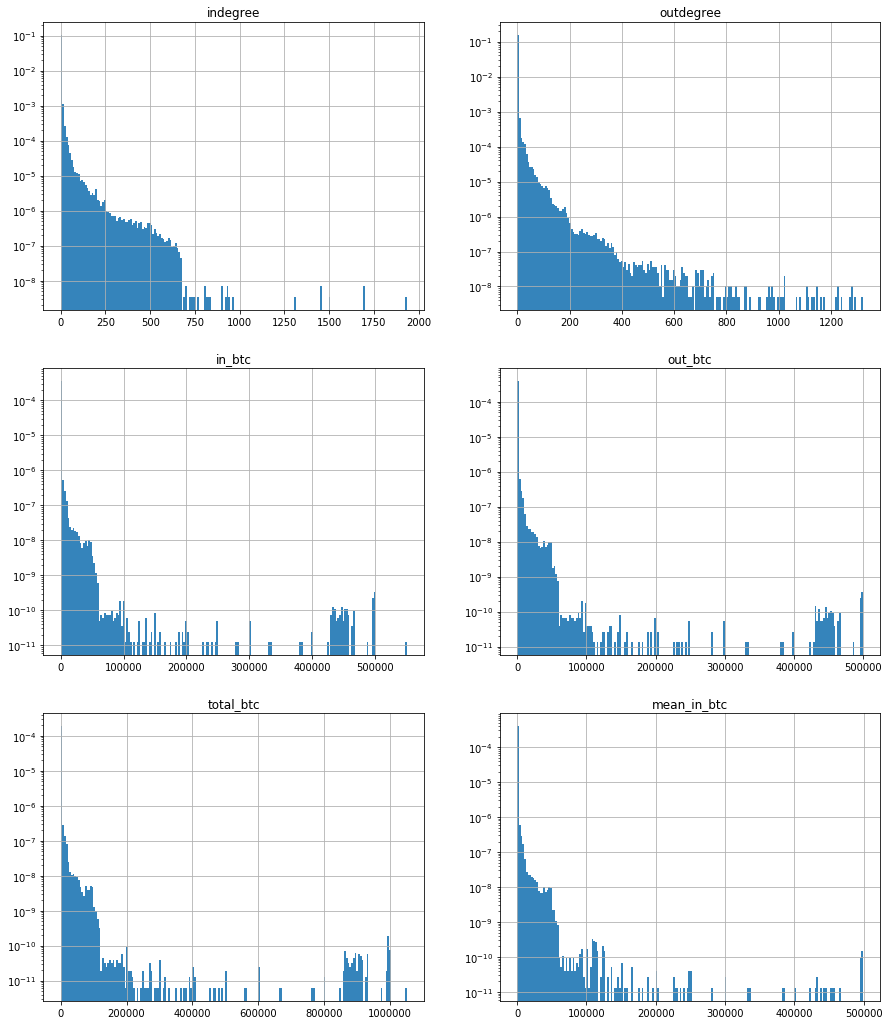

In [5]:
# o_df.hist(figsize=(18, 20), bins=50, xlabelsize=9, ylabelsize=9, log=True);
plot_distributions(o_df)

In [6]:
scaled_data = o_df.copy()
pd.options.display.float_format = '{:.3f}'.format

# Scale

In [7]:
scaled_data['indegree'] = np.log1p(scaled_data['indegree'])
scaled_data['outdegree']= np.log1p(scaled_data['outdegree'])
scaled_data['in_btc'] = np.log1p(scaled_data['in_btc'])
scaled_data['out_btc']= np.log1p(scaled_data['out_btc'])
scaled_data['total_btc']= np.log1p(scaled_data['total_btc'])
scaled_data['mean_in_btc']= np.log1p(scaled_data['mean_in_btc'])
scaled_data['mean_out_btc']= np.log1p(scaled_data['mean_out_btc'])

scaled_data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,0.942,1.072,1.334,1.352,1.726,1.174,1.055
std,0.461,0.268,1.579,1.587,1.800,1.518,1.386
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.693,1.099,0.095,0.095,0.187,0.062,0.049
50%,0.693,1.099,0.659,0.672,1.087,0.429,0.399
75%,1.099,1.099,2.261,2.309,2.965,1.889,1.708
max,7.567,7.188,13.218,13.122,13.864,13.121,13.122


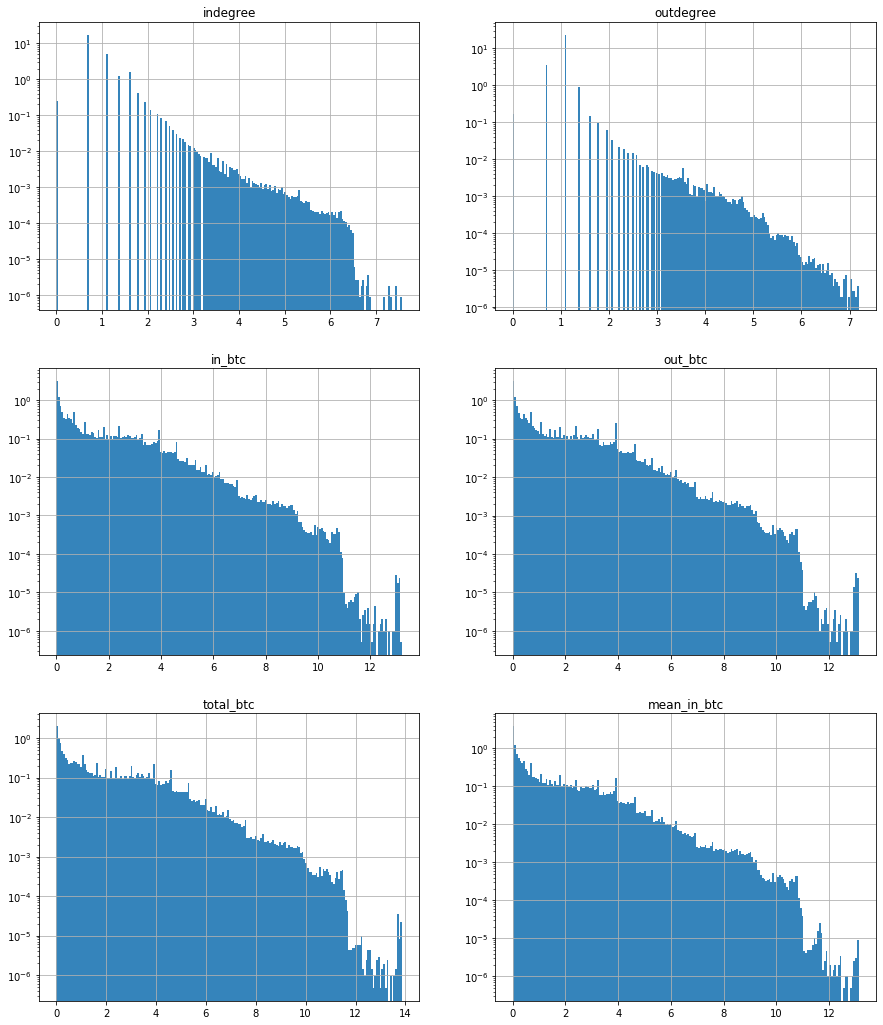

In [8]:
# scaled_data.hist(figsize=(18, 20), bins=50, xlabelsize=9, ylabelsize=9, log=True);
plot_distributions(scaled_data)

# Normalize

In [9]:
# scaler = MinMaxScaler(feature_range=(0,1))
scaler = RobustScaler()
# scaler = Normalizer(norm='l2')
# scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(scaled_data),columns=scaled_data.columns)
scaled_data.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,0.613,-0.026,0.312,0.307,0.230,0.408,0.395
std,1.138,0.268,0.729,0.717,0.648,0.831,0.836
min,-1.710,-1.099,-0.304,-0.304,-0.391,-0.235,-0.240
25%,0.000,0.000,-0.260,-0.261,-0.324,-0.201,-0.211
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,1.000,0.000,0.740,0.739,0.676,0.799,0.789
max,16.953,6.089,5.799,5.623,4.599,6.946,7.668


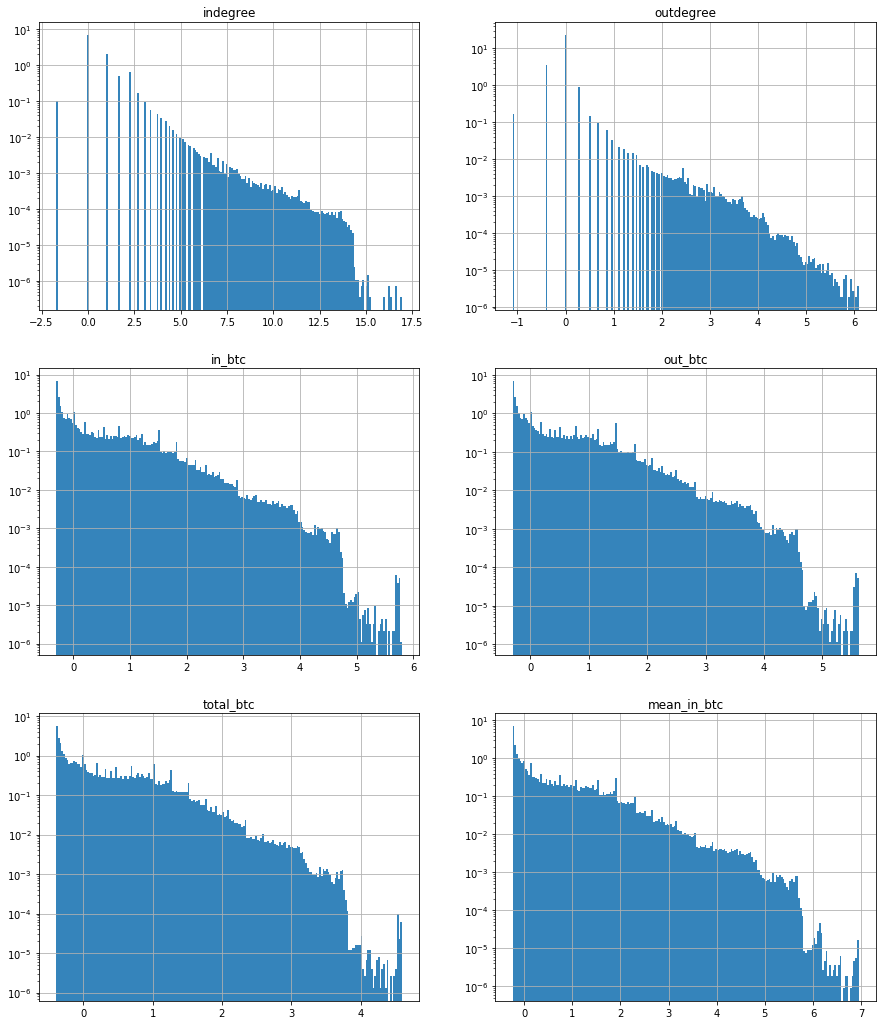

In [10]:
# scaled_data.hist(figsize=(18, 20), bins=50, xlabelsize=9, ylabelsize=9, log=True);
plot_distributions(scaled_data)

In [11]:
scaled_data['is_malicious'] = df['out_and_tx_malicious']

In [12]:
scaled_data.head(5)

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,is_malicious
0,-1.710,-0.405,-0.304,1.472,1.024,-0.235,2.129,0
1,0.000,0.000,1.511,1.472,1.270,1.917,1.723,0
2,0.000,-0.405,0.803,0.779,0.705,1.078,1.205,0
3,0.000,-0.405,1.411,1.247,1.143,1.798,1.829,0
4,0.000,0.000,1.281,1.247,1.089,1.645,1.431,0


# Class Distribution

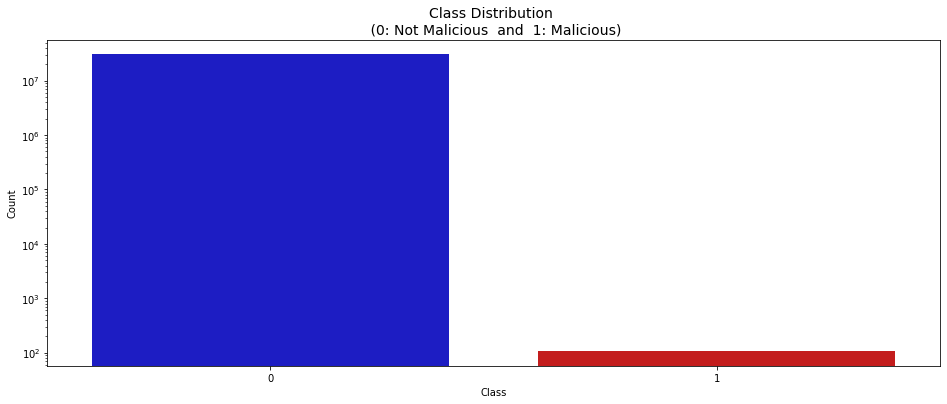

In [13]:
colors = ["#0101DF", "#DF0101"]

plt.figure(figsize=(16, 6))
ax = sns.countplot('is_malicious', data=scaled_data, palette=colors, log=True)
plt.title('Class Distribution \n (0: Not Malicious  and  1: Malicious)', fontsize=14)
ax.set(xlabel='Class', ylabel='Count')
plt.show()

In [14]:
scaled_data.is_malicious.value_counts()

0    30248026
1         108
Name: is_malicious, dtype: int64

# Correlation Visual

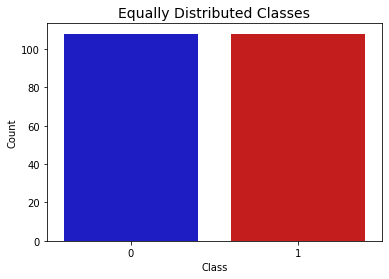

In [15]:
fraud_df = scaled_data.loc[scaled_data['is_malicious'] == 1]
non_fraud_df = scaled_data.loc[scaled_data['is_malicious'] == 0].sample(len(fraud_df))
new_df = pd.concat([fraud_df, non_fraud_df])

ax = sns.countplot('is_malicious', data=new_df, palette=colors)
ax.set(xlabel='Class', ylabel='Count')
plt.title('Equally Distributed Classes', fontsize=14)

plt.show()

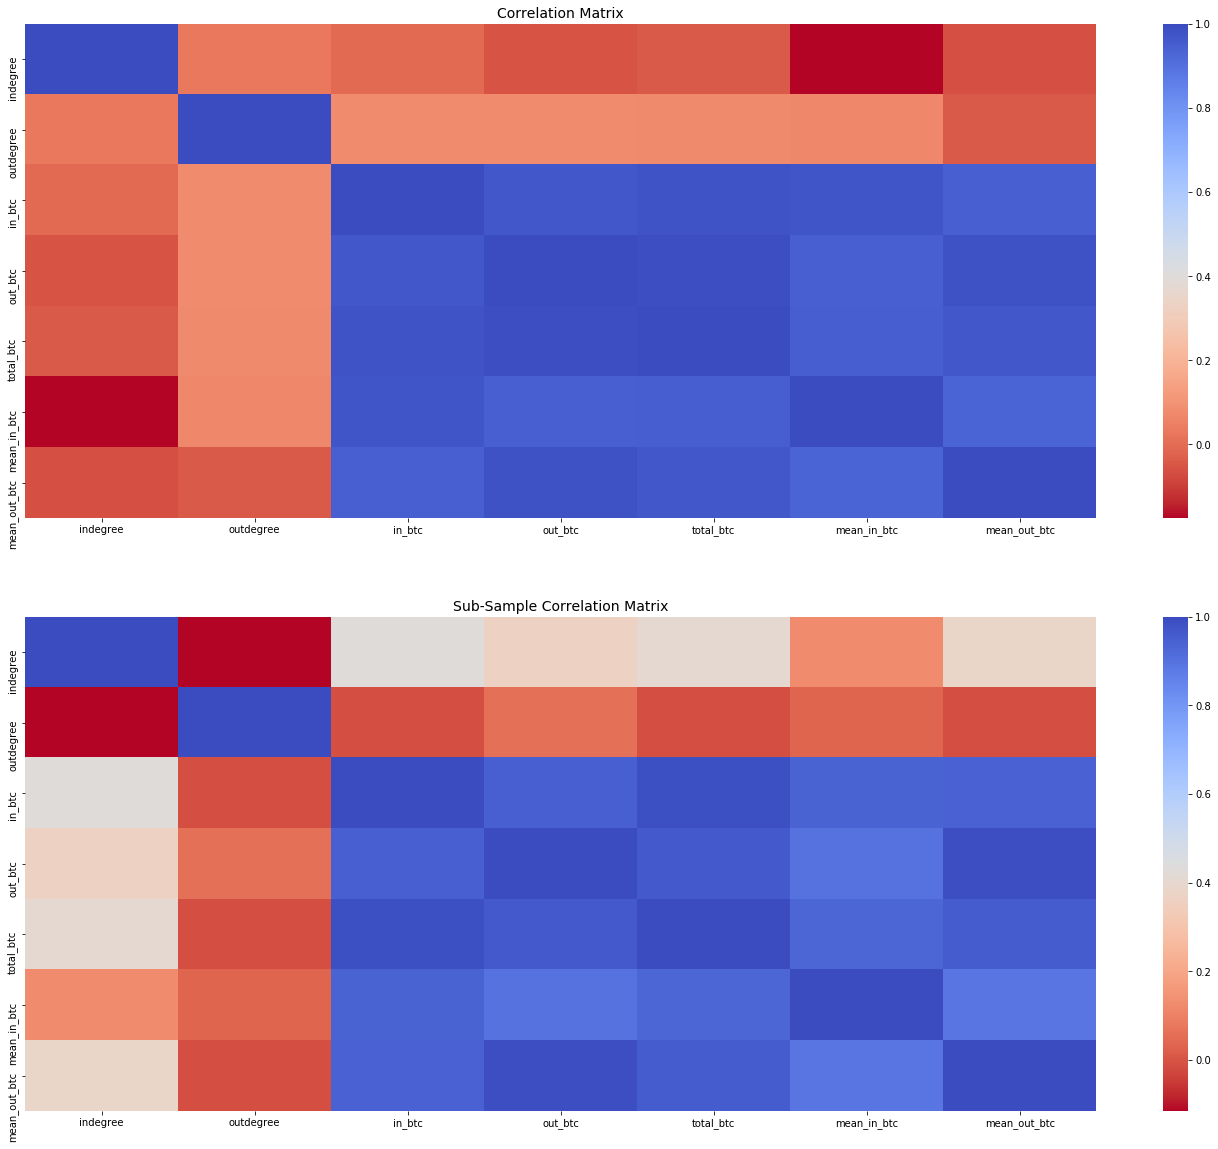

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = scaled_data.iloc[:,0:7].corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.iloc[:,0:7].corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Sub-Sample Correlation Matrix', fontsize=14)
plt.show()

Negative Correlations: indegree, outdegree negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: in_btc, mean_in_btc, out_btc, mean_out_btc and total_btc are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

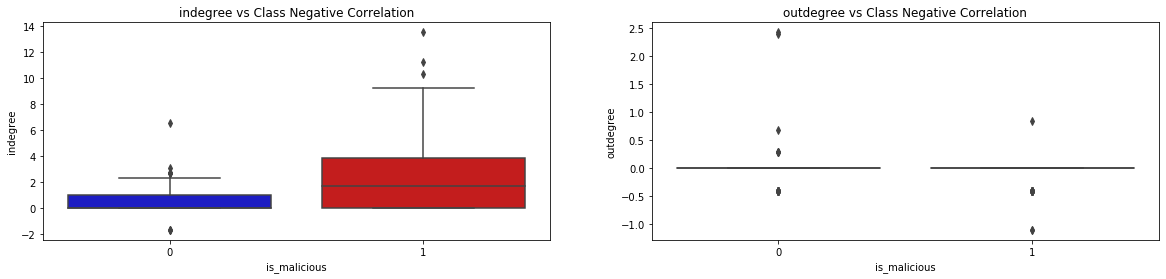

In [17]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="is_malicious", y="indegree", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('indegree vs Class Negative Correlation')

sns.boxplot(x="is_malicious", y="outdegree", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('outdegree vs Class Negative Correlation')

plt.show()

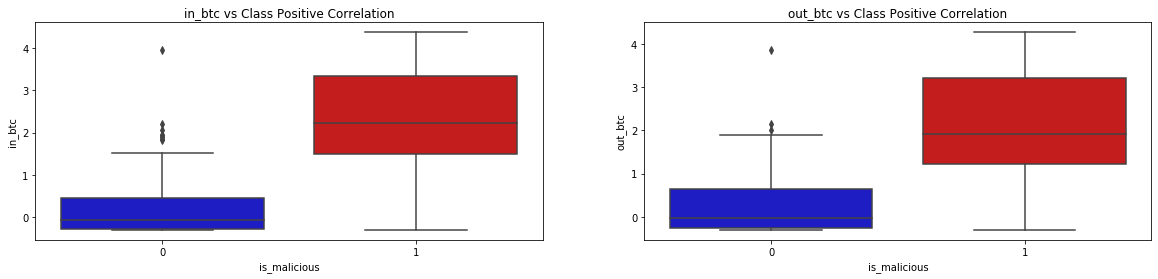

In [18]:
f, axes = plt.subplots(ncols=2, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="is_malicious", y="in_btc", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('in_btc vs Class Positive Correlation')

sns.boxplot(x="is_malicious", y="out_btc", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('out_btc vs Class Positive Correlation')

plt.show()

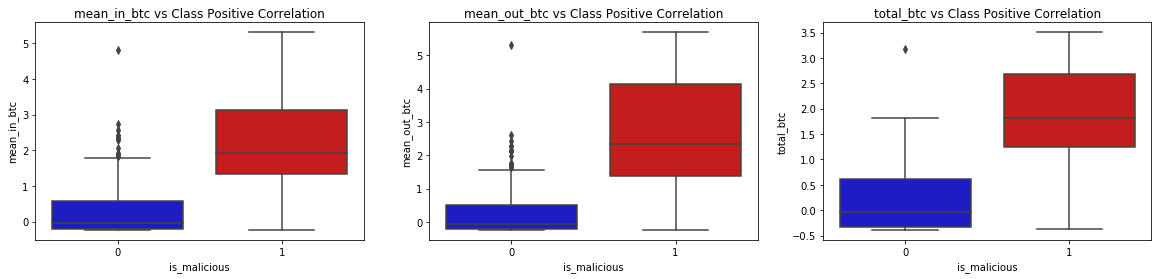

In [19]:
f, axes = plt.subplots(ncols=3, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)

sns.boxplot(x="is_malicious", y="mean_in_btc", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('mean_in_btc vs Class Positive Correlation')

sns.boxplot(x="is_malicious", y="mean_out_btc", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('mean_out_btc vs Class Positive Correlation')

sns.boxplot(x="is_malicious", y="total_btc", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('total_btc vs Class Positive Correlation')

plt.show()

# Pair Plot

In [20]:
scaled_data_pair = scaled_data.copy()

In [21]:
scaled_data_pair['is_malicious'] = scaled_data_pair['is_malicious'].astype(str).str.replace('0','Non-malicious')
scaled_data_pair['is_malicious'] = scaled_data_pair['is_malicious'].astype(str).str.replace('1','Malicious')
scaled_data_pair.rename(columns={'is_malicious':'Malicious-Transactions'}, inplace=True)
scaled_data_pair.head(5)


,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,Malicious-Transactions
0,-1.710,-0.405,-0.304,1.472,1.024,-0.235,2.129,Non-malicious
1,0.000,0.000,1.511,1.472,1.270,1.917,1.723,Non-malicious
2,0.000,-0.405,0.803,0.779,0.705,1.078,1.205,Non-malicious
3,0.000,-0.405,1.411,1.247,1.143,1.798,1.829,Non-malicious
4,0.000,0.000,1.281,1.247,1.089,1.645,1.431,Non-malicious


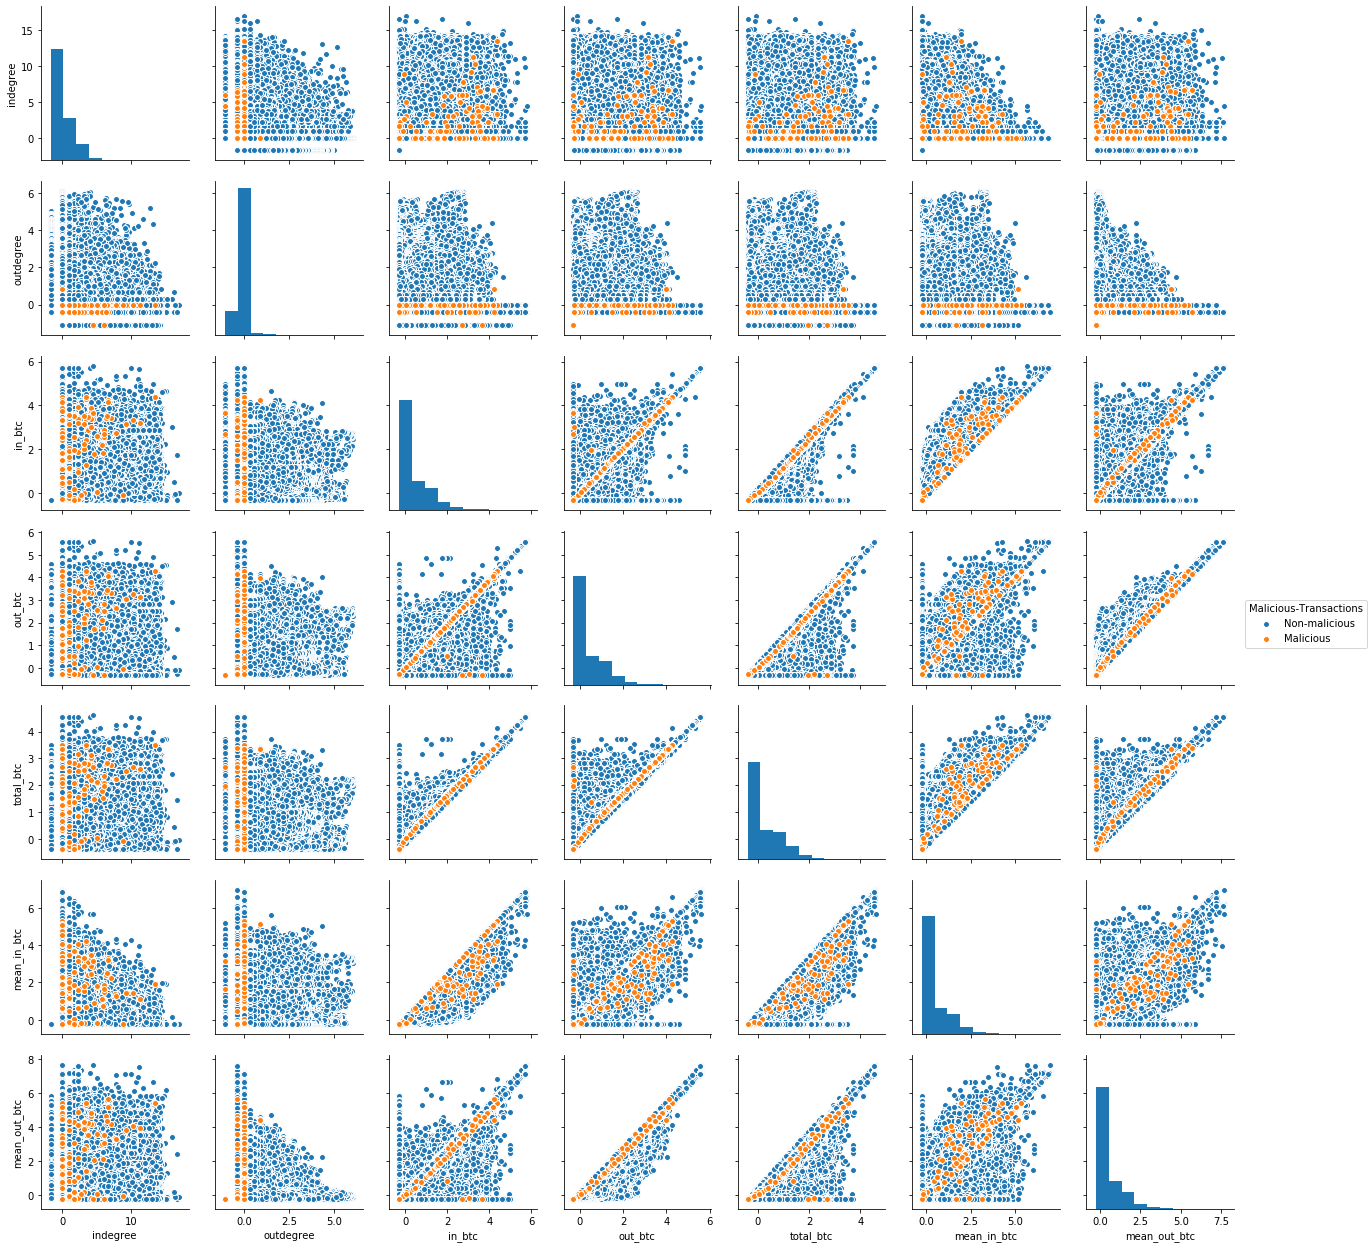

In [22]:
sns.pairplot(scaled_data_pair, hue = 'Malicious-Transactions')